In [211]:
#this is to digitize lithologies for better processing. It will be easier to plot them
def str_array2floats(strarray):
    floats=[]
    for s in strarray:
        try:
            floats.append(float(s))
        except:
            floats.append(np.nan)
    return floats


# np.array(lith_labels).shape
def merge_similar_layers(loc_layer,loc_lith_labels):
    res_layer=[]
    res_label=[]
    for a in np.unique(loc_lith_labels):
        single_layer_prop=0
        if a!=-1:
            single_layer_prop=0
            for n,l in zip(loc_lith_labels,loc_layer):
                if a==n:
                    single_layer_prop += l
            res_layer.append(single_layer_prop)
            res_label.append(a)
    return res_layer,res_label

# for processing purpose at all locations, same number of layers and labels prepared. 
def make_same_numb_layers(master_l_thicknesses,lith_labels):
    layersinlocations=[len(l) for l in master_l_thicknesses]
    maxls=max(layersinlocations)
    j=-1
    for ml in master_l_thicknesses:
        j +=1
        if len(ml)<maxls:
            for i in range(maxls-len(ml)):
                ml.append(0)
                lith_labels[j]=np.append(lith_labels[j],-1)
    loc_layers=np.array(master_l_thicknesses)
    return loc_layers,np.array(lith_labels)

#it is thought that if all the locations have layer thickness information according to sorted layers, it will be lot easier to 
#plot or process the information so the function for sorting single location and creating zero thickness layer for missing 
#layer
def get_sortedlayers4loc(mod_loc_layers,mod_loc_layer_lbls,unique_lbls):
    sorted_loc_layer=[]
    for ul in unique_lbls:
        sorted_loc_layer.append(0)
        for e,l in zip(mod_loc_layers,mod_loc_layer_lbls):
            if l==ul:
                sorted_loc_layer[-1]=e
#     sorted_loc_layer[-1]
    return sorted_loc_layer
def get_depths(thickness_layer_array,elevation):
    depths=[]
    d=-elevation   
    for e in thickness_layer_array:
        d += e
        depths.append(d)
    return depths

In [19]:
locs=np.array([[80.1922, 25.559480000000001], [79.624529999999993, 25.544969999999999], [79.517300000000006, 25.5366]])
indx=np.argsort(locs,axis=0)
locs[indx[:,0]]

array([[ 79.5173 ,  25.5366 ],
       [ 79.62453,  25.54497],
       [ 80.1922 ,  25.55948]])

In [3]:
# Modules and data loading
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import re
import math
from scipy.interpolate import griddata,interp2d
# import mpl_toolkits.mplot3d.art3d.Poly3DCollection
from   mpl_toolkits.mplot3d.art3d import Poly3DCollection
sys.path.append('..')
from pickle_fns import *
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\jalaun\\'
base_folder=r'D:\Ameyem Office\Projects\Electric surveys\Easwar files\Mahoba\\'
vesdf,data_dfs=load_pkl(base_folder+'vesdf_datadf.pkl')
# vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N,Ele=vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float),str_array2floats(vesdf.RL.values)
# Ele=[float(re.findall('\d*\.\d+|\d+',E)[0]) for E in Ele]
# E,N,data_dfs[0]

NameError: name 'str_array2floats' is not defined

In [213]:
# # string = 'i think mabe 124.6 + <font color="black"><font 13 face="Times New Roman">but I don\'t have a big experience it just how I see it in my eyes <font color="green"><font face="Arial">fun stuff'
# # import re
# # re.sub('<.*?>', '', string)
# # # re.sub('^w$', '', string)
# # re.findall('\d*\.\d+|\d+',string)
# vesdf
# # tuple(vesdf[['Block','Location','VES No.']].values[0])
# p=[('119', [79.80932, 25.401219999999999]), ('128', [79.844200000000001, 25.451280000000001]), ('114', [79.859570000000005, 25.483709999999999]), ('124', [79.888670000000005, 25.531839999999999])]
# p
# profile=[]
# for a,b in p:
#     profile.append(b)
# profile=   np.array(profile)
# profile[:,0]

In [214]:
# fig=plt.figure(figsize=(6*2,5))
# # plt.plot([1,2],[3,4])
# w,h=fig.get_size_inches()
# # from matplotlib.figure import figaspect
# # w, h = figaspect(2.)
# # w,h
# yw=0.2
# xw=yw*h/w
# xw,yw

In [215]:
# vesdf.Easting.values
# Ele
# ublocks=np.unique(vesdf.Block.values)
# np.where(ublocks=='JAITPUR')[0][0]
len(vesdf['VES No.'].values),vesdf['VES No.'].values

(76, array(['112', '113', '114', '115', '116', '117', '118', '119', '120',
        '121', '122', '123', '124', '125', '126', '127', '128', '129',
        '130', '131', '132', '133', '134', '135', '136', '137', '138',
        '139', '140', '141', '142', '143', '144', '145', '146', '147',
        '148', '149', '150', '151', '152', '153', '154', '155', '156',
        '157', '158', '159', '160', '161', '162', '163', '164', '165',
        '166', '167', '168', '169', '170', '171', '172', '173', '174',
        '175', '176', '177', '178', '179', '180', '181', '182', '183',
        '184', '185', '186', '187'], dtype=object))

In [216]:
#preparation of lith dictionary for tikamgarh
fg_undersat=['Fractured Granite, may be under saturation',
        'Fractured granite , may be under saturation',
        'Fractured granite, may be under saturation',
        'Fractured/weathered granite, may be under saturation']
gran= ['Granite',]
hard_gran=['Hard Granite', 'Hard granite', ]
high_weath_gr =['Highly Weathered granite','Highly weathered Granite', 'Highly weathered granite','Soil with kankars/Highly weathered Granite',
        'Soil/Highly weathered Granite',]
soil_w_kankar= ['Overburden/top soil with kankars', 'Soil', 'Soil with kankars', 'Top Soil with kankars',
        'Top soil', 'Top soil with kankars', 'Top soils with kankars',]
weather_gran=[ 'Weathered Granite', 'Weathered granite']
lith_dict={0:soil_w_kankar,1:high_weath_gr,2:weather_gran,3:gran ,4:fg_undersat,5:hard_gran,}

In [217]:
# # preparation for Mahoba
# soil_w_kankar= ['Dry top Soil',  'Dry top soil', 'Dry top soil with kankar',       'Dry top soil with kankars',
#                'Loose top soil', 'Top Soil',       'Top dry soil', 'Top silty soil', 'Top soil',
#        'Top soil with gravels', 'Top soil with kankar',       'Top soil with kankars',]
# high_weath_gr =['Highly Fractured /weathered Granite', 'Highly Weathered Granite',
#        'Highly fractured /weathered Granite',]

# weather_gran=['Fractured  granite, may be under saturation',
#        'Fractured Granite, may be under saturation',
#        'Fractured granite, may be under saturation',
#        'Fractured/Weathered Granite',
#        'Fractured/Weathered Granite, may be under saturation',
#        'Fractured/weathered Granite',
#        'Fractured/weathered Granite, may be under saturation',
#        'Fractured/weathered granite',
#        'Fractured/weathered granite ,may be under saturation',
#        'Fractured/weathered granite, may be under saturation','Moderately weathered Granite','Slightly weathered Granite',
#  'Weathered Granite',
#  'Weathered Granite/Gneiss',
#  'Weathered granite,',
#  'weathered granite'
#             ]

# hard_gran=['Hard  Granite', 'Hard Granite', 'Hard Granite, massive in nature',
#        'Hard granite', 'Hard massive Granite', 'Hard massive granite',
#        'Hard rock/granite/Gneiss', 'Hard strong  granite',
#        'Hard strong Granite', 'Hard strong granite','Massive strong granite','Strong Granite', 'Strong massive Granite',
#           'Moderately Strong Granite',
#  'Moderately strong Granite',
#  'Moderately strong granite',
#  ]
# soil_clay=['Clay',
#  'Clay ,may be under saturation',
#  'Clay may be under saturation',
#  'Clay zone, may be under saturation',
#  'Clay, may be under saturation',
#  'Clay,may be under saturation','clay',       'sandy soil','SiltyClay', 'SiltyClay, may be under saturation', 'Siltyclay',
#        'Siltyclay ,may be under saturation', 'Siltyclay to silty sand',
#        'Siltyclay to silty sand ,may be under saturation',
#        'Siltyclay to siltysand',
#        'Siltyclay to siltysand, may be under saturation',
#        'Siltyclay, may be under saturation','Silty Clay', 'Silty Clay, may be under saturation',
#        'Silty clay ,may be under saturation', 'Silty clay to silty sand',
#        'Silty clay to silty sand , may be under saturation',
#        'Silty clay to silty sand, may be under saturation',
#        'Silty clay under saturation',
#        'Silty clay, may be under saturation',
#        'Silty clay,may be under saturation','Sandy soil, may be under saturation', ]
# silty_sand=['Silty sand','Silty  sand to fine sand',
#        'Silty sand to fine sand',
#        'Silty sand to fine sand ,may be under saturation',
#        'Silty sand to fine sand, may be under saturation',
#        'Silty sand, may be under saturation', 'Silty to fine sand','Fine to medium sand',
#  'Fine to medium sand , may be under saturation',
#  'Fine to medium sand, may be under saturation',]
# coarse_sand=[ 'Medium to coarse sand',
#        'Medium to coarse sand, may be under saturation',
#        'Medium to coarse sand/fractured granite',
#        'Medium to coarse sand/fractured granite, may be under saturation','Coarse sand',
#  'Coarse sand with gravels',
#  'Coarse sand/Fractured/weathered Granite, may be under saturation',
#  'Coarse sand/fractured/weathered granite',]

 
 
# lith_dict={0:soil_w_kankar,1:soil_clay,2:weather_gran,3:high_weath_gr,4:silty_sand,5:coarse_sand,6:hard_gran,}
# lith_dict
# all_lith=[]
# for j in lith_dict:
#     all_lith.extend(lith_dict[j] )
# # all_lith
# save_pkl(base_folder+'lith_dict.pkl',lith_dict)

In [218]:
nlayers=max([len(d) for d in data_dfs])
all_liths=[[]]*nlayers
all_liths=[]
for i in range(nlayers):
    all_liths.append([])
for df in data_dfs:
    for i in range(len(df['Interpreted Lithology'])):

        all_liths[i].append(df['Interpreted Lithology'].iloc[i])
#         break
#     break
for a in all_liths :
    print(np.unique(a))

['Dry alluvium soil' 'Dry soil with kankar' 'Soil with Kankar'
 'Soil with kankar' 'Soil with kankars' 'Yellowish sandy clay']
['Alluvium soil' 'Clay and Weathered pink granite may be under saturation'
 'Clay with kankar' 'Clay with quartz and weathered pink granite'
 'Course sand with weathered granite'
 'Fractured pink Granite, may be under saturation' 'Soil with Kankar'
 'Soil with kankar' 'Weathered grey granite'
 'Weathered pink Granite to pink granite mafic mineral increase'
 'Weathered pink granite' 'Yellowish sandy clay'
 'quartz and weathered pink granite Clay']
['Clay and Weathered pink granite may be under saturation'
 'Clay with kankar' 'Clay with quartz and weathered pink granite'
 'Granite mafic mineral increase-May be under Saturation'
 'Grey granite mafic mineral increase' 'Hard massive granite'
 'Pink granite mafic mineral increase may be fractured and under saturation'
 'Pink granite slightly black&white  fine to meadium grains-May be under Saturation'
 'Soil with Kan

In [311]:
#mohaba after editing

lith_dict={
    0:['Dry alluvium soil', 'Dry soil with kankar', 'Soil with Kankar', 
 'Soil with kankar', 'Soil with kankars', 'Yellowish sandy clay'],
    1:['quartz and weathered pink granite Clay','Alluvium soil',

 'Clay with kankar',  
        
        
    ],
    2:['Weathered grey granite', 'Weathered pink granite','Weathered pink  granite',
         'Course sand with weathered granite','Clay and Weathered pink granite may be under saturation','Clay with quartz and weathered pink granite',
    ],
    3:['Pink granite mafic mineral increase may be fractured and under saturation','Fractured pink Granite, may be under saturation',
        'Weathered pink Granite to pink granite mafic mineral increase','Granite mafic mineral increase-May be under Saturation',
       'Grey granite mafic mineral increase','Pink granite slightly black&white  fine to meadium grains-May be under Saturation',
    ],
    4:['Hard massive granite',]
}


# lith_dict={
#     0:['Dry alluvium soil', 'Dry soil with kankar', 'Soil with Kankar',
#  'Soil with kankar', 'Soil with kankars', 'Yellowish sandy clay'],
#     1:[
#         'Alluvium soil','Clay with quartz and weathered pink granite','Clay and Weathered pink granite may be under saturation','Weathered pink  granite',
#  'Clay with kankar',  
        
        
#     ],
#     2:[
#          'Weathered grey granite', 'Weathered pink granite','Course sand with weathered granite','Fractured pink Granite, may be under saturation',
#     ],
#     3:[
#         'Weathered pink Granite to pink granite mafic mineral increase','Granite mafic mineral increase-May be under Saturation',
#        'Grey granite mafic mineral increase','Pink granite slightly black&white  fine to meadium grains-May be under Saturation',
#     ],
#     4:['Hard massive granite',]
# }

lith_dict_summay={
    0:'Soil/Dry soil/ Soil with kankars',
    1:'Clayee/Weathered granite/Fractured granite',
    2:'Weathered granite',
    3:'Weathered Granite to granite mafic mineral increase',
    4:'Hard massive granite'
}

save_pkl(base_folder+'lith_dict.pkl',lith_dict)

In [312]:
uall_liths=[np.unique(a) for a in all_liths]
[len(a) for a in all_liths],[len(a) for a in uall_liths],uall_liths
ualiths=[]
for u in uall_liths:
    ualiths.extend(u)
len(ualiths ),len(np.unique(ualiths) ),np.unique(ualiths) 

def find_not_in_lithDict(all_unique_liths,lith_dict):
    all_lith=[]
    for j in lith_dict:
        all_lith.extend(lith_dict[j] )
    to_be_included=[]
    for l in all_unique_liths:
        if not l in all_lith:
            to_be_included.append(l)
    return to_be_included
find_not_in_lithDict(np.unique(ualiths),lith_dict) 

[]

In [313]:
lith=[]
for df in data_dfs:
#     print(df.iloc[0])
    lith.extend(df['Interpreted Lithology'].values)
# data_dfs[0]
np.unique(np.array(lith))
# others=[]
# for l in np.unique(np.array(lith)):
#     if l in all_lith:
#         pass
#     else:
# #         print('\'',l.strip(),'\'',end=', ')
#         others.append(l)
# others   
# ,np.array(lith) # you need to manually separate

array(['Alluvium soil',
       'Clay and Weathered pink granite may be under saturation',
       'Clay with kankar', 'Clay with quartz and weathered pink granite',
       'Course sand with weathered granite', 'Dry alluvium soil',
       'Dry soil with kankar',
       'Fractured pink Granite, may be under saturation',
       'Granite mafic mineral increase-May be under Saturation',
       'Grey granite mafic mineral increase', 'Hard massive granite',
       'Pink granite mafic mineral increase may be fractured and under saturation',
       'Pink granite slightly black&white  fine to meadium grains-May be under Saturation',
       'Soil with Kankar', 'Soil with kankar', 'Soil with kankars',
       'Weathered grey granite', 'Weathered pink  granite',
       'Weathered pink Granite to pink granite mafic mineral increase',
       'Weathered pink granite', 'Yellowish sandy clay',
       'quartz and weathered pink granite Clay'], 
      dtype='<U81')

In [314]:
# E,N

In [315]:
# import numpy as np
# n=10
# pos = [E,N] #np.random.normal(size=(2,10), scale=1e-5)

# spots = [{'pos': j, 'data': 1} for j in zip(E,N)] 
# pos,spots

In [316]:
# #layers for jalaun
# top_soil=['Top  Dry Soil', 'Top  Dry soil', 'Top  Soil', 'Top  soil','Top Dry  soil', 'Top Dry Soil', 'Top Dry soil', 'Top Soil',
#         'Top dry soil', 'Top soil']

# silty_clay=['Silty  Clay', 'Silty Clay',
#         'Silty Sandy', 'Silty Sandy  Clay', 'Silty Sandy Clay',
#         'Silty sandy Clay', 'Silty sandy Clay may under saturation',
#         'Silty sandy clay, may be under saturation', 'SiltyClay',
#            'Clay',   
#          'Sandy Silty Clay',
#         'Sandy Silty Clay, may be under saturation',

#         ]

# sandy_clay=[    'Dry Sandy Clay', 
#     'Fine Sandy Clay, may be under saturation', 
#     'Sand  Clay, may be under saturation', 'Sand Silty Clay',
#         'SandY Clay', 'SandY Soil, may be under saturation',
#         'SandY Soil, may be under saturation C', 'Sandy  Clay',
#         'Sandy  Clay, may be under saturation', 'Sandy  Silty Clay',
#         'Sandy Clay', 'Sandy Clay may be under saturation',
#         'Sandy Clay may under saturation',
#         'Sandy Clay,  It may be under saturation',
#         'Sandy Clay, It may be under saturation',
#         'Sandy Clay, may be under saturation', 'Sandy clay',
#         'Sandy clay, may be under saturation', 'Sandy layer', 'Sandy soil',
#         'Sandy soil , may be under saturation',
#         'Sandy soil, may be under saturation',
#         'Coarse SandY Soil, may be under saturation',
#         'Coarse Sandy  Clay, may be under saturation',
#         'Coarse Sandy Soil, may be under saturation', 'Coarse Sandy soil',
#         'Coarse Sandy soil , may be under saturation',
#         'Coarse Sandy soil, may be under saturation',
#         'Compact Sandy Clay', 'Compacted Sandy soil', ]


# coarse_sand=[
#     'Sand, may be under saturation',        
#         'Fine Sand , may be under saturation',
#         'Fine Sand, may be under saturation',
#         'Gravelly Sand , may be under saturation',
#         'Gravelly Sand, It may be under saturation.',
#         'Gravelly Sand, may be under saturation', 
#         'Gravelly sand, may be under saturation',
#         'Gravelly Sand',
#         'Gravelly dry Sand',
#         'Gravelly sand',         
#         'Coarse Sand', 'Coarse Sand, may be under saturation',
#         'Boulder zones / Gravelly Sand',
#         'Boulder zones / Gravelly Sand, may be under saturation',
#         ]


# compact_sand_hard_rock=['Dry Boulder bed',       
#         'Compact Graelly Sand', 'Compact Gravelly Sand',
#         'Compact Gravelly sand,',
#         'Compact Gravelly sand, may be under saturation',        
#         'Hard Compacted Gravelly Sand',
#         'Hard Compacted Gravelly Sand, may be under saturation',
#         'Hard Compacted Sand',        
#         'Hard Boulder bed','Hard Rock',
#              ] 
# lith_dict={0:top_soil,1:silty_clay,2:sandy_clay,3:coarse_sand,4:compact_sand_hard_rock,}     
# # lith_dict        
        

In [317]:
# lith_dict,df['Interpreted Lithology'].values

lith_dict,get_lables(df,lith_dict) 

Soil with Kankar
Clay and Weathered pink granite may be under saturation
Weathered pink Granite to pink granite mafic mineral increase


({0: ['Dry alluvium soil',
   'Dry soil with kankar',
   'Soil with Kankar',
   'Soil with kankar',
   'Soil with kankars',
   'Yellowish sandy clay'],
  1: ['quartz and weathered pink granite Clay',
   'Alluvium soil',
   'Clay with kankar'],
  2: ['Weathered grey granite',
   'Weathered pink granite',
   'Weathered pink  granite',
   'Course sand with weathered granite',
   'Clay and Weathered pink granite may be under saturation',
   'Clay with quartz and weathered pink granite'],
  3: ['Pink granite mafic mineral increase may be fractured and under saturation',
   'Fractured pink Granite, may be under saturation',
   'Weathered pink Granite to pink granite mafic mineral increase',
   'Granite mafic mineral increase-May be under Saturation',
   'Grey granite mafic mineral increase',
   'Pink granite slightly black&white  fine to meadium grains-May be under Saturation'],
  4: ['Hard massive granite']},
 [0, 2, 3])

In [318]:
def get_lables(df,lith_dict):
    labels=[]
    for s in df['Interpreted Lithology'].values:
        print(s)
        for i in range(len(lith_dict)):
            if s in lith_dict[i]:
#                 print(lith_dict[i])
                if i in labels and i!=labels[-1]:
                    labels.append(i*10)
                else:
                    labels.append(i)
                break
    return labels
get_lables(df,lith_dict),df
#utilization of get labels
for df in data_dfs:
    print('a')
    print(get_lables(df,lith_dict) )
    df['lith_label']=get_lables(df,lith_dict)    
lith_labels=np.array(df['lith_label'].values)

Soil with Kankar
Clay and Weathered pink granite may be under saturation
Weathered pink Granite to pink granite mafic mineral increase
a
Dry soil with kankar
Clay with kankar
Clay with kankar
Clay with kankar
Hard massive granite
[0, 1, 1, 1, 4]
Dry soil with kankar
Clay with kankar
Clay with kankar
Clay with kankar
Hard massive granite
a
Soil with Kankar
Clay with quartz and weathered pink granite
Pink granite slightly black&white  fine to meadium grains-May be under Saturation
[0, 2, 3]
Soil with Kankar
Clay with quartz and weathered pink granite
Pink granite slightly black&white  fine to meadium grains-May be under Saturation
a
Yellowish sandy clay
Yellowish sandy clay
Weathered pink granite
Weathered pink Granite to pink granite mafic mineral increase
[0, 0, 2, 3]
Yellowish sandy clay
Yellowish sandy clay
Weathered pink granite
Weathered pink Granite to pink granite mafic mineral increase
a
Yellowish sandy clay
quartz and weathered pink granite Clay
Weathered pink Granite to pink g

In [319]:
for vv,df in zip(vesdf['VES No.'].values,data_dfs):
    print(vv)
    if vv=='121':
        print(df)

112
113
114
115
116
117
118
119
120
121
  Layer No. Resistivity(Ωm) Thickness(m) Depth (m)   Elev.  \
0         1          92.977      0.98922   0.98922  152.01   
1         2          10.064       10.184    11.173  141.83   
2         3          425.14           --        --      --   

                               Interpreted Lithology  lith_label  
0                                  Dry alluvium soil           0  
1                                      Alluvium soil           1  
2  Weathered pink Granite to pink granite mafic m...           3  
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


In [320]:




# lith_labels

#construction of lith labels for layers or thicknesses

np.set_printoptions(precision=3, suppress=True)
master_l_thicknesses=[]
lith_labels=[]
liths=[]
max_strata_thickness=300
for df in data_dfs:
#     print(df['Thickness(m)'].values.astype(np.float))
    layers_values=str_array2floats(df['Thickness(m)'].values)
    lastlayer_thickness=[max_strata_thickness-np.nansum(layers_values) if math.isnan(x) else x for x in layers_values]
#     print(lastlayer_thickness)
    master_l_thicknesses.append(lastlayer_thickness)
    lith_labels.append(np.array(df['lith_label'].values))
    liths.append(np.array(df['Interpreted Lithology'].values))
elevations=str_array2floats(vesdf.RL.values)
# layers_values,np.nansum(layers_values),master_l_thicknesses,lith_labels
# with lith dict here most of the layers are repeated.
# And similar layers need to be merged

In [321]:
liths

[array(['Dry soil with kankar', 'Clay with kankar', 'Clay with kankar',
        'Clay with kankar', 'Hard massive granite'], dtype=object),
 array(['Soil with Kankar', 'Clay with quartz and weathered pink granite',
        'Pink granite slightly black&white  fine to meadium grains-May be under Saturation'], dtype=object),
 array(['Yellowish sandy clay', 'Yellowish sandy clay',
        'Weathered pink granite',
        'Weathered pink Granite to pink granite mafic mineral increase'], dtype=object),
 array(['Yellowish sandy clay', 'quartz and weathered pink granite Clay',
        'Weathered pink Granite to pink granite mafic mineral increase'], dtype=object),
 array(['Soil with Kankar',
        'Clay and Weathered pink granite may be under saturation',
        'Weathered pink Granite to pink granite mafic mineral increase'], dtype=object),
 array(['Dry soil with kankar', 'Weathered grey granite',
        'Grey granite mafic mineral increase'], dtype=object),
 array(['Soil with kankar', '

In [323]:
# np.unique(vesdf.Block.values)
for ll, lt in zip(lith_labels,liths):
    print(ll)
    print(lt)

[0 1 1 1 4]
['Dry soil with kankar' 'Clay with kankar' 'Clay with kankar'
 'Clay with kankar' 'Hard massive granite']
[0 2 3]
['Soil with Kankar' 'Clay with quartz and weathered pink granite'
 'Pink granite slightly black&white  fine to meadium grains-May be under Saturation']
[0 0 2 3]
['Yellowish sandy clay' 'Yellowish sandy clay' 'Weathered pink granite'
 'Weathered pink Granite to pink granite mafic mineral increase']
[0 1 3]
['Yellowish sandy clay' 'quartz and weathered pink granite Clay'
 'Weathered pink Granite to pink granite mafic mineral increase']
[0 2 3]
['Soil with Kankar'
 'Clay and Weathered pink granite may be under saturation'
 'Weathered pink Granite to pink granite mafic mineral increase']
[0 2 3]
['Dry soil with kankar' 'Weathered grey granite'
 'Grey granite mafic mineral increase']
[0 0 0 0 4]
['Soil with kankar' 'Soil with kankar' 'Soil with kankar'
 'Soil with kankar' 'Hard massive granite']
[0 2 3]
['Soil with kankars' 'Clay with quartz and weathered pink grani

In [ ]:
#utilization of merge_similar_layers  and make_same_numb_layers functions

mod_layers=[]
mod_layer_lbls=[]
# 
for lyr,lbl in zip(master_l_thicknesses,lith_labels): # changed from loc_layers,lith_labels
    mlyr,mlbl=merge_similar_layers(lyr,lbl)
    mod_layers.append(mlyr)
    mod_layer_lbls.append(mlbl)
mod_layers, mod_layer_lbls 

# final_layers,final_labels=segregate_layers(mod_layers,mod_layer_lbls)
# final_layers,final_labels=make_same_numb_layers(mod_layers,mod_layer_lbls)


#create zero thickness layers for missing layers in each location
mod_layers,mod_layer_lbls
def get_unique_labels(mod_layer_lbls):
    res=[]
    for m in mod_layer_lbls:
        res +=m
    unique_lbls=np.unique(res)
    return unique_lbls
unique_lbls=get_unique_labels(mod_layer_lbls)
final_thicks=[]
for m_llyrs,m_llbls in zip(mod_layers,mod_layer_lbls):
    final_thicks.append(get_sortedlayers4loc(m_llyrs,m_llbls,unique_lbls))
final_thicks

#final depths with default 0 to 5 or 0-10 layers
final_depths=[]
for ft,el in zip(final_thicks,elevations):
    fd = get_depths(ft,el)
    final_depths.append(fd)
final_depths=np.array(final_depths)
final_thicks=np.array(final_thicks)
# final_depths, final_thicks,unique_lbls      

for ll, lt,fd in zip(lith_labels,liths,final_depths):
    print(ll)
    print(lt)
    print(fd)

In [1]:
# master_l_thicknesses

In [ ]:
mod_layers,mod_layer_lbls,
final_depths[:,-1]
# unique_lbls,lith_dict




In [327]:
# np.append(np.array(N),final_depths,axis=1)
final_depths.shape
N.shape=(N.shape[0],1)
E.shape=(E.shape[0],1)
final_depths.shape,N.shape
xy_final_depths=np.append(np.array(E),np.append(np.array(N),final_depths,axis=1),axis=1)
np.save(base_folder+'final_depths_labes_summary.npy',(xy_final_depths,unique_lbls,lith_dict_summay))

In [322]:
def get_curveType(df):
    resarray=df['Resistivity(Ωm)'].values.astype(np.float)

    ctype=''
    for i in range(len(resarray)-2):
        ctype +=get_Typeof3(resarray[i:i+3])
    print({ctype:resarray})
    return ctype
        
    
def get_Typeof3(res3):
    if len(res3)!=3:
        print("Array or tuple of 3 elements expected")
    if res3[0]<res3[1]:
        if res3[1]<res3[2]:
            return 'A'
        else:
            return 'K'
    else:
        if res3[1]<res3[2]:
            return 'H'
        else:
            return 'Q'
            
curves  =[]
for df in data_dfs:
    curves.append(get_curveType(df))
#     print(get_curveType(df))
ucurves=np.unique(curves)
ucurves, counts = np.unique(curves, return_counts=True)
ucurves, counts
print (np.asarray((ucurves, counts)).T)
# ucurves,np.bincount(curves),curves


{'HKH': array([   18.507,     1.484,   572.27 ,    72.845,  9691.7  ])}
{'A': array([  10.387,   18.4  ,  290.46 ])}
{'HA': array([  37.995,    7.03 ,   21.047,  681.71 ])}
{'H': array([  17.362,    8.838,  490.99 ])}
{'H': array([  11.991,    4.176,  564.94 ])}
{'H': array([  16.918,    5.745,  572.27 ])}
{'HKH': array([   18.507,     1.484,   572.27 ,    72.845,  9691.7  ])}
{'H': array([  11.09 ,    5.908,  506.76 ])}
{'HKH': array([   43.982,     3.272,  3100.3  ,   240.63 ,  6720.2  ])}
{'H': array([  92.977,   10.064,  425.14 ])}
{'HA': array([  14.035,   10.148,   28.366,  739.27 ])}
{'H': array([  21.597,    4.647,  801.68 ])}
{'HA': array([  10.334,    5.166,   15.599,  321.37 ])}
{'H': array([  27.565,    6.591,  296.77 ])}
{'H': array([  79.644,   10.018,  388.81 ])}
{'H': array([   7.864,    4.463,  335.43 ])}
{'K': array([  15.101,  582.84 ,   83.741])}
{'HKHK': array([   39.673,    20.713,    34.859,     6.534,  4209.9  ,  1450.8  ])}
{'AKH': array([    6.784,   125.99 , 

In [328]:
# x,y,dz=E,N,final_depths[:,-1]
# calc_plot_grid(x,y,dz)

In [260]:
# x,y,dz
from scipy.interpolate import griddata,interp2d
# from scipy.ndimage import zoom
def smoothing(zi,window=(3,3)):
    r,c=zi.shape
    w=np.array((np.array(window)-1)/2,dtype=int)
    res=zi.copy()
    for i in range(w[0],r-w[0]):
        for j in range(w[1],c-w[1]):
            res[i,j]=np.mean(zi[i-w[0]:i+w[0],j-w[1]:j+w[1]])
    return res
def calc_plot_grid(x,y,dz):
    xi = np.linspace(min(x),max(x),100)
    yi = np.linspace(min(y),max(y),100)
    # grid the data.
    zi = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='cubic')
    zi[zi<0]=0
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(x,y,marker='o',c='b',s=5)
def plot_grid(xi,yi,zi):
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    plt.show()

                
np.array(final_depths).T[0]
x=E;y=N
zis=[]
window=(11,11)
bigwindow=(17,17)

frac_change_allowed=0.01


xi = np.linspace(min(x),max(x),500)
yi = np.linspace(min(y),max(y),500)
for dz in final_depths.T[0:]:
    mindz,maxdz=min(dz),max(dz)
    limits=mindz+frac_change_allowed*mindz,maxdz-frac_change_allowed*maxdz
    print('gridiing with three methods... just started!!!')
    zic = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='cubic')
#     zic=smoothing(zic,window=window);
    zil = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='linear')
#     zil=smoothing(zil,window=window);
    zin = griddata((x, y), dz, (xi[None,:], yi[:,None]), method='nearest')
    print('Smoothing underway')
    zin=smoothing(zin,window=bigwindow);
    zi=(zic+zil)/2

    zi[np.isnan(zi)]=zin[np.isnan(zi)]

    zi=smoothing(zi,window=bigwindow);
    zi=smoothing(zi,window=bigwindow);
    
    print('Smoothing done! plotting underway')

    zi[zi<limits[0]]=limits[0]
    zi[zi>limits[1]]=limits[1] 
    zis.append(zi)    
    f=plt.subplots( figsize=(12, 10))



#     zi=zic
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')

    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    plt.scatter(x,y,marker='o',c='b',s=10)
    for lx,ly,l in zip(E,N,vesdf['VES No.'].values):
            plt.plot(lx,ly,'k')
            plt.annotate(l, xy=(lx, ly))

    # plot data points.
#     plt.scatter(x,y,marker='o',c='b',s=5)
    plt.show()
#     break


gridiing with three methods... just started!!!


ValueError: invalid shape for input data points

In [261]:
# x=E;y=N
# mindz,maxdz,limits
zis

[]

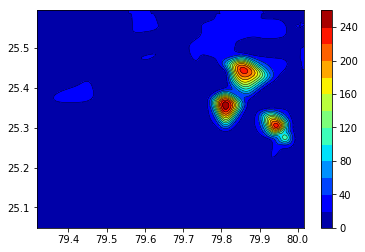

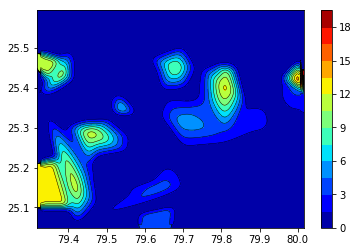

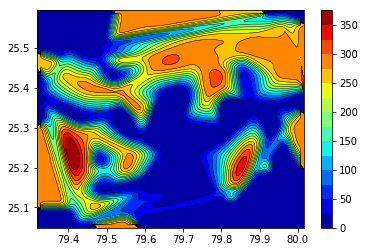

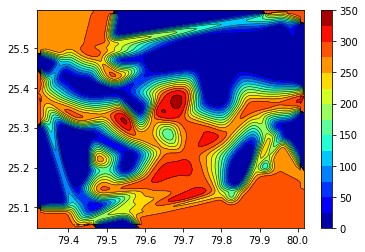

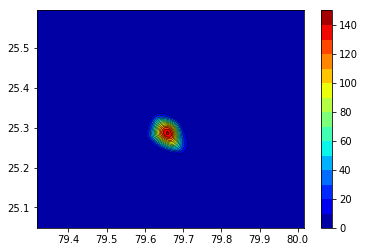

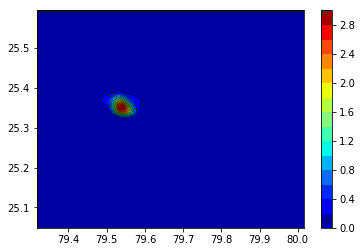

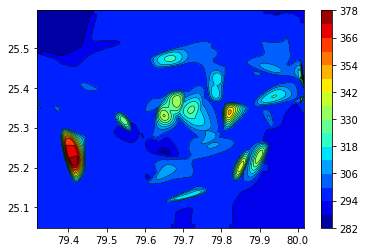

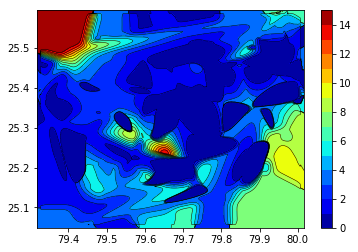

In [36]:
# zis=ozis.copy()
thks=[]

# plot_grid(xi,yi,zis[0])
for i in range(1,len(zis)):
    thk= zis[i].copy()-zis[i-1].copy()
    thk[thk<0]=0
    thks.append(thk)
    plot_grid(xi,yi,thk)
#     break

zr=thks[0].copy()
for z in thks[1:]:
    zr += z.copy()
plot_grid(xi,yi,zr)
thk=max_strata_thickness-zr
thk[thk<0]=0
thks.append(thk)
plot_grid(xi,yi,thk)

In [37]:
layers=np.array(thks)
layers.shape

layers_outfile='tikamgarh_layers_w_ele.npz'
layers_outfile=base_folder+'layers_w_ele.npz'
# ulablesfile='tikamgarh_thck_labels.npy'
np.savez(layers_outfile, unique_lbls,lith_dict,xi,yi,layers)
# np.save(ulablesfile, unique_lbls)

In [38]:
# layers_outfile='tikamgarh_layers.npz'
layers_outfile=base_folder+'layers_w_ele.npz'
npzfile=np.load(layers_outfile)
unique_lbls,lith_dict,xio,yio,layerso=npzfile['arr_0'],npzfile['arr_1'],npzfile['arr_2'],npzfile['arr_3'],npzfile['arr_4']
# np.save('tikamgarh_ele.npy',layers[0])

In [39]:
# vesdf['Block'].values,np.unique(upper(vesdf['Block'].values))
'ADbf'.upper()
blocks=[b.upper() for b in vesdf['Block'].values]
# blocks,
np.unique(blocks)

array(['CHARKHARI', 'JAITPUR', 'KABRAI', 'PANWARI'], 
      dtype='<U9')

In [40]:
# xi[:10],xio[:10],yi[:10],yio[:10]
vesdf[['Block','Location','VES No.','Easting','Northing']].values
# vesdf

array([['CHARKHARI', 'ASTHAUN', '112', '79.70821', '25.39074'],
       ['CHARKHARI', 'BAGRAUN', '113', '79.80574', '25.36380'],
       ['CHARKHARI', 'BAIHARI', '114', '79.85957', '25.48371'],
       ['CHARKHARI', 'BAMRARA', '115', '79.80996', '25.44046'],
       ['PANWARI', 'BHATEWARA KALAN/GOURHARI', '116', '79.61991',
        '25.44475'],
       ['CHARKHARI', 'CHANDAULI', '117', '79.71442', '25.51863'],
       ['CHARKHARI', 'CHARKHARIYA', '118', '79.70340', '25.22822'],
       ['CHARKHARI', 'FATEHPUR', '119', '79.80932', '25.40122'],
       ['CHARKHARI', 'GORKHA', '120', '79.63809', '25.38361'],
       ['CHARKHARI', 'GUDHA', '121', '79.67757', '25.44870'],
       ['CHARKHARI', 'JARDIN GANJ', '122', '79.76274', '25.36904'],
       ['CHARKHARI', 'KARAHARA KHURD', '123', '79.60247', '25.47527'],
       ['CHARKHARI', 'KUWAN/ BARI', '124', '79.88867', '25.53184'],
       ['CHARKHARI', 'PRATISTH/JARAULI', '125', '79.69702', '25.508554'],
       ['Charkhari', 'Jataura/Rewai', '126', '79.782

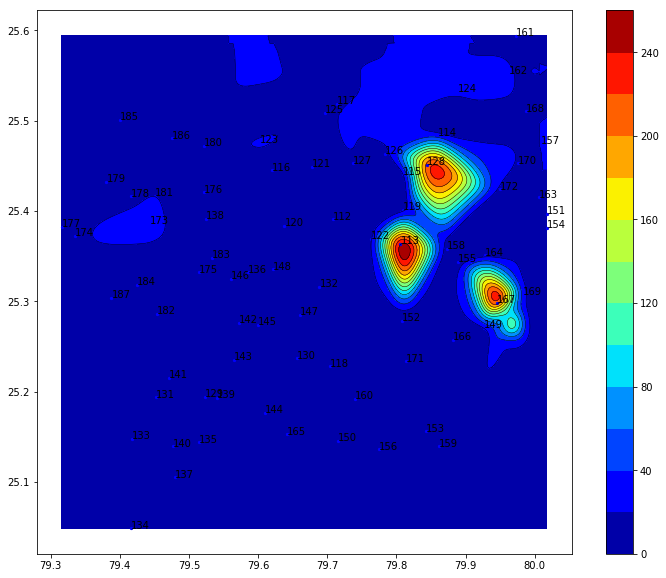

7

In [41]:
layers=layerso
xi,yi=xio,yio
f=plt.subplots( figsize=(12, 10))
CS = plt.contour(xi,yi,layers[0],15,linewidths=0.5,colors='k')

CS = plt.contourf(xi,yi,layers[0],15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
plt.scatter(x,y,marker='o',c='b',s=5)
for lx,ly,l in zip(E,N,vesdf['VES No.'].values):
        plt.plot(lx,ly,'k')
        plt.annotate(l, xy=(lx, ly))

plt.savefig('topsoil_thickness.png')
plt.show()
len(layers)

In [43]:
# # layers_outfile='tikamgarh_thck_layers.npy'
# # ulablesfile='tikamgarh_thck_labels.npy'
# # unique_lbls=np.load(ulablesfile)
# # layers=np.load(layers_outfile)
# final_lbls=[u if u<10 else np.uint8(u/10) for u in unique_lbls]
# # final_lbls
# coords=[]
# for i in range(r):
#     print(i,end=',')
#     for j in range(c):
#         lyrs=layers[:,i,j]
#         volumelogs.append(loggify(lyrs,unique_lbls,interval=0.5))
#         coords.append([xi[i],yi[j]])
# volumelogs=clip_longer_logs(volumelogs)

# xl,yl,zl,sec_logs=getasection(volumelogs,coords,x=78.8)


# from matplotlib import gridspec
# import matplotlib.colors as colors
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# f,ax=plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
# gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 
# ax[1] = plt.subplot(gs[1])
# color_def={'top_soil':'#CCCCCC','high_weath_gr':'#FFFF80','weather_gran':'#ACACFF','granite':'#F07800',
#            'frac_granite':'#FF99CC','hard_granite':'#B00600'}

# lith_label_def={0:'Top soil/w kankar',1:'Highly weath. Granite',2:'Weath. Granite',3:'Granite' ,4:'Und.Sat Frac. Granite',5:'Hard Granite',}
# facies_colors=[color_def[l] for l in color_def]
# # cluster=np.repeat(np.expand_dims(sec_logs[1],1), 100, 1)
# cmap_facies = colors.ListedColormap( facies_colors[0:len(unique_lbls)], 'indexed')
# im=ax[1].imshow(sec_logs.T, interpolation='none', aspect='auto',
#                         cmap=cmap_facies,vmin=0,vmax=6)
# facies_colors,final_lbls

In [45]:
# sec_logs.T

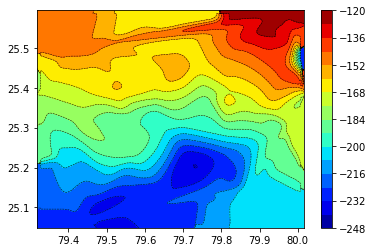

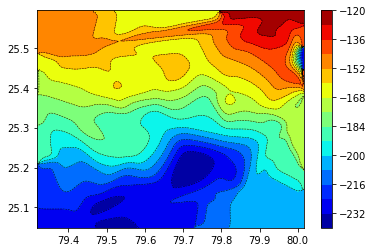

In [46]:
zis[0]

plot_grid(xi,yi,zis[0])
plot_grid(xi,yi,smoothing(zis[0],window=(11,11)))

[ 0.801  3.175  6.459  0.342]


IndexError: list index out of range

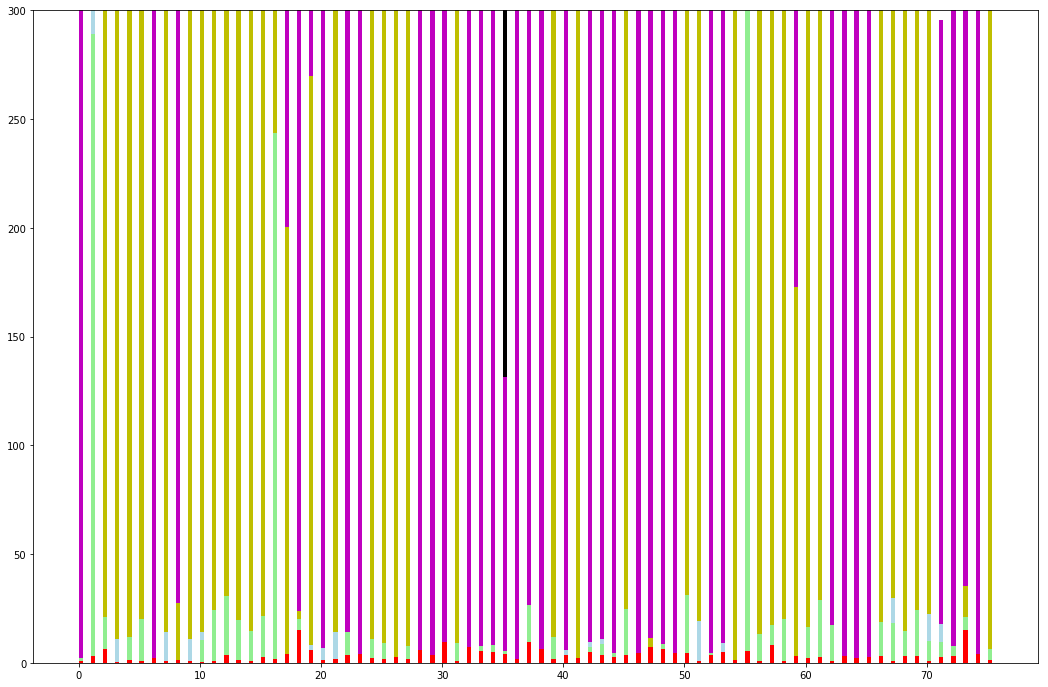

In [47]:
# menMeans = np.array([[20, 35, 30, 35, 27],
#                      [25, 32, 34, 20, 25],
#                      [21, 37, 30, 15, 5]])
# locations=['G13454', 'G2', 'G3', 'G4', 'G5']

menMeans=final_thicks.T.copy()
locations=vesdf.Location.values
print(menMeans[0][:4])
layers=['layer1', 'layer2','layer3','layer4','layer5']
colors=['r','lightgreen','lightblue','y','m','k']
_,N = menMeans.shape
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
# p1=[]
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
bottom=menMeans[0].copy()
# p1.append(ax.bar(ind+0.2, menMeans[0], width,color=colors[0]))
# for i in range(1,len(menMeans)):    
#     p1.append(ax.bar(ind+0.2, menMeans[i], width,bottom=bottom,color=colors[i] ))
#     bottom += menMeans[i]
p1=ax.bar(ind+0.2, menMeans[0], width,color=colors[0],ecolor='black')
for i in range(1,len(menMeans)):    
    p1 += ax.bar(ind+0.2, menMeans[i], width,bottom=bottom,color=colors[i] ,ecolor='black')
    bottom += menMeans[i]

print(menMeans[0][:4])
patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
            '-', '+', 'x', '\\', '*', 'o', 'O')
patterns = np.array(['.', '*', '\\','o', 'O']*len(locations))
patterns=patterns.reshape(len(locations),len(layers))

# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.','+', 'x')
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.',
#             '-', '+', 'x', '\\', '*', 'o', 'O')
for bar, pattern in zip(p1, patterns.T.ravel()):
    bar.set_hatch(pattern)
ax.set_ylabel('Depth')
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind+0.2+width/2, minor=False)
ax.set_xticklabels( locations, minor=False)
ax.xaxis.tick_top()
ax.set_ylim(0,210)
# ax.set_yticks(np.arange(0, max(bottom), 10))
# ax.legend(p1, layers,loc=4)
ax.invert_yaxis()
# ax.titlepad=300
plt.title('Scores by group and gender',y=1.01)
plt.show()

In [52]:
# final_thicks,
final_depths
final_labels
# np.save('final_depths.npy',final_depths)

NameError: name 'final_labels' is not defined

In [48]:
import sys
sys.path.append('..')
sys.path.append('../geostatsmodels')

from geostatsmodels import utilities, variograms, model, kriging, geoplot